# Using Python in Machine Learning

## Import

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [113]:
d=pd.read_csv("./jupyter_project/data/pima-data.csv")
d.shape

(768, 10)

In [114]:
d.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [110]:
d.isnull().values.any()

False

In [111]:
def plot_corr(d,size=11):
    corr=d.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

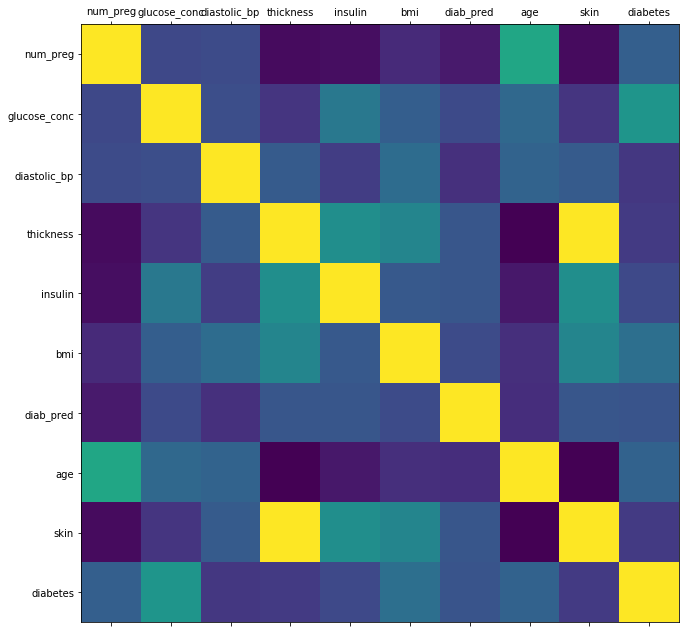

In [115]:
plot_corr(d)

In [116]:
d.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [117]:
d.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [118]:
del d['skin']

In [119]:
d.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


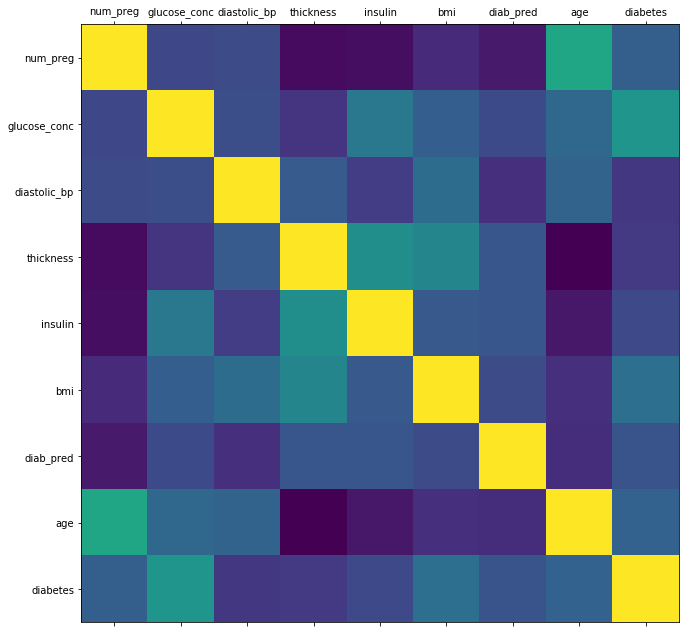

In [120]:
plot_corr(d)

## Datatype Check

In [121]:
d.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [122]:
diabetes_map= {True: 1, False: 0}
d['diabetes']= d['diabetes'].map(diabetes_map)

In [123]:
d.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Class Distribution

In [124]:
tot= len(d)
true_tot= len(d.loc[d['diabetes']==1])
false_tot= len(d.loc[d['diabetes']==0])
print "true: ", true_tot, (true_tot*1.0/tot)*100, "%"
print "false: ", false_tot, (false_tot*1.0/tot*100), "%"

true:  268 34.8958333333 %
false:  500 65.1041666667 %


## Split Data

70% for training and 30% for testing

In [125]:
from sklearn.model_selection import train_test_split
feature_cols= ['num_preg','glucose_conc', 'diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class= ['diabetes']

x= d[feature_cols].values
y= d[predicted_class].values
split_test_size= 0.3

x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=split_test_size, random_state=42)

In [126]:
print "training set %: ", (len(x_train)*1.0/len(d.index))*100
print "test set %: ", (len(x_test)*1.0/len(d.index))*100

training set %:  69.921875
test set %:  30.078125


## Split Verification

In [127]:
print"Original true: ", len(d.loc[d['diabetes']==1]), 100*len(d.loc[d['diabetes']==1])*1.0/len(d.index), "%"
print "Original false: ", len(d.loc[d['diabetes']==0]), 100*len(d.loc[d['diabetes']==1])*1.0/len(d.index), "%"

print "Training true: ", len(y_train[y_train[:]==1]), 100*len(y_train[y_train[:]==1])*1.0/len(y_train), "%"
print "Training false: ", len(y_train[y_train[:]==0]), 100*len(y_train[y_train[:]==0])*1.0/len(y_train), "%"

print "Test true: ", len(y_test[y_test[:]==1]), 100*len(y_test[y_test[:]==1])*1.0/len(y_test), "%"
print "Test false: ", len(y_test[y_test[:]==0]), 100*len(y_test[y_test[:]==0])*1.0/len(y_test), "%"

Original true:  268 34.8958333333 %
Original false:  500 34.8958333333 %
Training true:  188 35.009310987 %
Training false:  349 64.990689013 %
Test true:  80 34.632034632 %
Test false:  151 65.367965368 %


## Missing Data

In [128]:
d.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
print "rows in dataset :", len(d)
print "rows missing glucose_conc :", len(d.loc[d['glucose_conc']==0])
print "rows missing diastolic_bp :", len(d.loc[d['diastolic_bp']==0])
print "rows missing thickness :", len(d.loc[d['thickness']==0])
print "rows missing insulin :", len(d.loc[d['insulin']==0])
print "rows missing bmi :", len(d.loc[d['bmi']==0])
print "rows missing diab_pred :", len(d.loc[d['diab_pred']==0])
print "rows missing age :", len(d.loc[d['age']==0])



rows in dataset : 768
rows missing glucose_conc : 5
rows missing diastolic_bp : 35
rows missing thickness : 227
rows missing insulin : 374
rows missing bmi : 11
rows missing diab_pred : 0
rows missing age : 0


## Using Mean Imputation

In [130]:
from sklearn.preprocessing import Imputer
fill_0= Imputer(missing_values=0, strategy="mean", axis=0)
x_train= fill_0.fit_transform(x_train)
x_test= fill_0.fit_transform(x_test)

## Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB

nb_model= GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

## Performance on Training Data

In [132]:
nb_predict_test= nb_model.predict(x_test)
from sklearn import metrics

print ("Accuracy: ", metrics.accuracy_score(y_test, nb_predict_test))

('Accuracy: ', 0.73593073593073588)


## Metrics

In [133]:
print "Confusion matrix"
print metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])
print "TP FP"
print "FN TN"
print ""

print "Classification Report"
print metrics.classification_report(y_test, nb_predict_test, labels=[1,0])
print "Recall= TP/(TP+FN)"
print "Precision= TP/(TP+FP)"

Confusion matrix
[[ 52  28]
 [ 33 118]]
TP FP
FN TN

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231

Recall= TP/(TP+FN)
Precision= TP/(TP+FP)


## Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [135]:
rf_predict_train= rf_model.predict(x_train)

print "Accuracy: ", metrics.accuracy_score(y_train, rf_predict_train)

Accuracy:  0.98696461825


## Predict Test Data

In [136]:
rf_predict_test= rf_model.predict(x_test)

print "Accuracy: ", metrics.accuracy_score(y_test, rf_predict_test)

Accuracy:  0.731601731602


In [137]:
print "Confusion matrix"
print metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0])
print ""

print "Classification Report"
print metrics.classification_report(y_test, rf_predict_test, labels=[1,0])

Confusion matrix
[[ 50  30]
 [ 32 119]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.62      0.62        80
          0       0.80      0.79      0.79       151

avg / total       0.73      0.73      0.73       231



High accuracy with training data, but low accuracy with test data: Overfitting Use cross-validation to remove overfitting

## Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

lr_model= LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test= lr_model.predict(x_test)

print "Accuracy: ", metrics.accuracy_score(y_test, lr_predict_test)

Accuracy:  0.744588744589


In [139]:
print "Confusion matrix"
print metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])
print ""
print "Classification Report"
print metrics.classification_report(y_test, lr_predict_test, labels=[1,0])

Confusion matrix
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



## Setting Regularization Parameter

In [140]:
C_start= 0.1
C_end= 5
C_inc= 0.1
C_values, recall_scores= [],[]

C_val= C_start
best_recall_score= 0
while C_val<C_end:
    C_values.append(C_val)
    lr_model_loop= LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test= lr_model_loop.predict(x_test)
    
    recall_score= metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if recall_score>best_recall_score:
        best_recall_score= recall_score
        best_lr_predict_test= lr_predict_loop_test
    C_val += C_inc

1st best recall score is & at:  0.6125 1.4


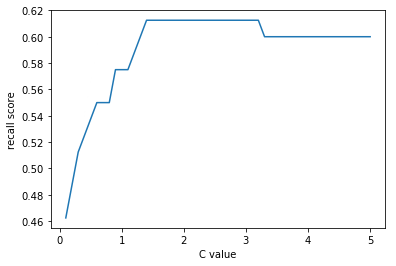

In [141]:
best_score_C_val= C_values[recall_scores.index(best_recall_score)]
print "1st best recall score is & at: ", best_recall_score, best_score_C_val

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Unbalanced Classes

## Logistic Regression with class_weight="balanced"

In [142]:
C_start= 0.1
C_end= 5
C_inc= 0.1
C_values, recall_scores= [],[]

C_val= C_start
best_recall_score= 0
while C_val<C_end:
    C_values.append(C_val)
    lr_model_loop= LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test= lr_model_loop.predict(x_test)
    
    recall_score= metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if recall_score>best_recall_score:
        best_recall_score= recall_score
        best_lr_predict_test= lr_predict_loop_test
    C_val += C_inc

1st best recall score is & at:  0.7375 0.3


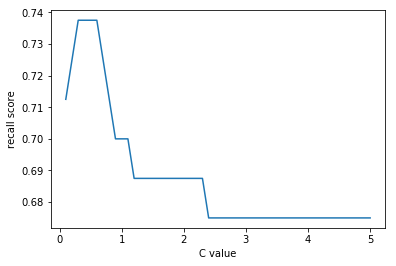

In [143]:
best_score_C_val= C_values[recall_scores.index(best_recall_score)]
print "1st best recall score is & at: ", best_recall_score, best_score_C_val

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [144]:
from sklearn.linear_model import LogisticRegression

lr_model= LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test= lr_model.predict(x_test)

print "Accuracy: ", metrics.accuracy_score(y_test, lr_predict_test)

Accuracy:  0.714285714286


In [145]:
print "Confusion matrix"
print metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])
print ""

print "Classification Report"
print metrics.classification_report(y_test, lr_predict_test, labels=[1,0])

Confusion matrix
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



## Cross-validation: AlgorithmCV

### Logistic RegressionCV

In [146]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model= LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=10, cv=5, refit=True, class_weight="balanced")
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [147]:
lr_cv_predict_test= lr_cv_model.predict(x_test)

print "Accuracy: ", metrics.accuracy_score(y_test, lr_cv_predict_test)
print "Confusion matrix"
print metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0])
print ""

print "Classification Report"
print metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0])

Accuracy:  0.701298701299
Confusion matrix
[[ 53  27]
 [ 42 109]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.66      0.61        80
          0       0.80      0.72      0.76       151

avg / total       0.72      0.70      0.71       231



## END